<a href="https://colab.research.google.com/github/gustavoramos82/Prevendo-Compre-de-Carrros/blob/main/Predi%C3%A7%C3%A3o_na_Compra_de_Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predição na Aquisição de Carro

Neste projeto é baseado neste dataset do kaggle(disponivel [aqui](https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset)) cujo objetivo é desenvolver um modelo de machine learning para prever se o cliente ira comprar o carro ou não, com base nos dados do cliente como idade, genero e salário anual, seguindo a metodologia do CRISP-DM.


## Metodologia Crisp-dm
![crispdm](https://2315530342-files.gitbook.io/~/files/v0/b/gitbook-x-prod.appspot.com/o/spaces%2Fb66bdV3JnCYJ5yeWf5dy%2Fuploads%2Fgit-blob-e3eea337334d513c6bceedd362fbd336cd41817d%2Fcrisp_dm.drawio.png?alt=media)

# Entendimento dos Dados

In [ ]:
# Importando os módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
compra = pd.read_csv('car_data.csv')
compra.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


### Dicionário dos Dados
- **User ID**: ID do cliente.
- **Gender**: Genero do cliente.
- **Age**: Idade do cliente.
- **AnnualSalary**: Salário Anual.
- **Purchased**: Se adquiriu o carro.

In [ ]:
# Eliminar a coluna User id já que o mesmo não será importante para análise nem para modelagem
compra.drop('User ID',axis=1,inplace=True)

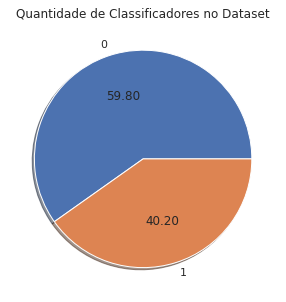

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Quantidade de Classificadores no Dataset')
plt.pie(compra['Purchased'].value_counts(),shadow=True,autopct='%1.2f',
        labels=compra['Purchased'].value_counts().index);

Text(0, 0.5, 'Gênero')

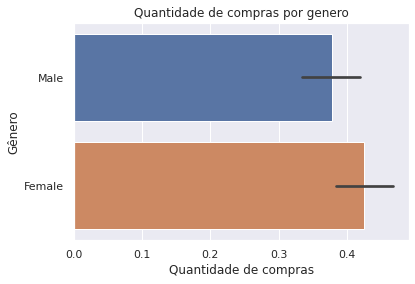

In [ ]:
plt.title('Quantidade de compras por genero')
sns.set(style='darkgrid')
sns.barplot(x='Purchased',y='Gender',data=compra)
plt.xlabel('Quantidade de compras')
plt.ylabel('Gênero')

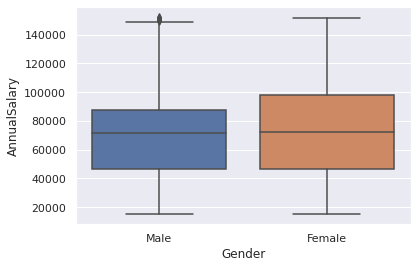

In [ ]:
sns.boxplot(x='Gender',y='AnnualSalary',data=compra)

Text(0, 0.5, 'Quantidade')

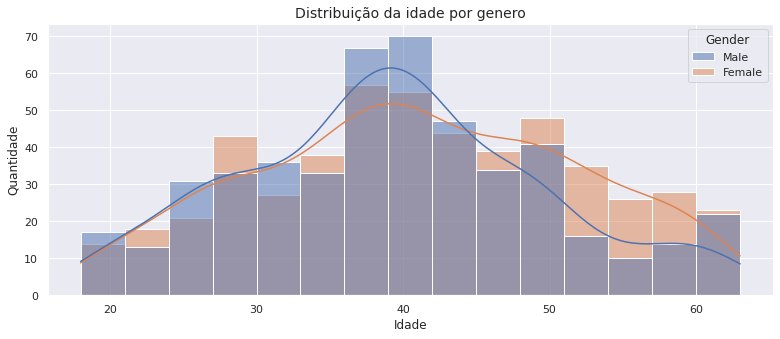

In [ ]:
plt.figure(figsize=(13,5))
plt.title('Distribuição da idade por genero',fontsize=14)
sns.histplot(x='Age',data=compra,hue='Gender',kde=True)
plt.xlabel('Idade')
plt.ylabel('Quantidade')

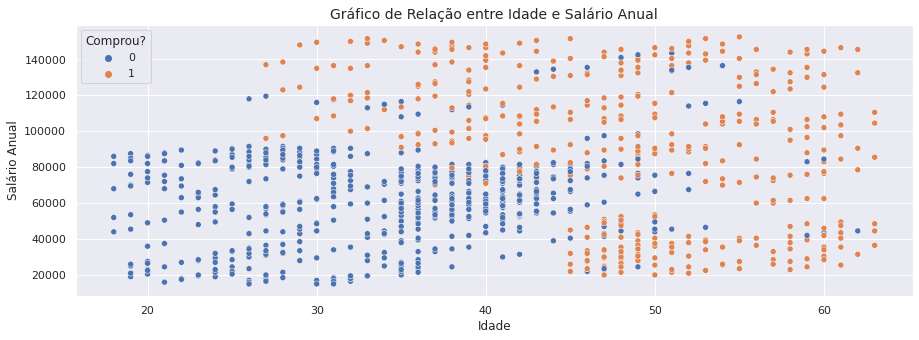

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Gráfico de Relação entre Idade e Salário Anual',fontsize=14)
sns.scatterplot(x='Age',y='AnnualSalary',data=compra,hue='Purchased')
plt.xlabel('Idade')
plt.ylabel('Salário Anual')
plt.legend(title='Comprou?');

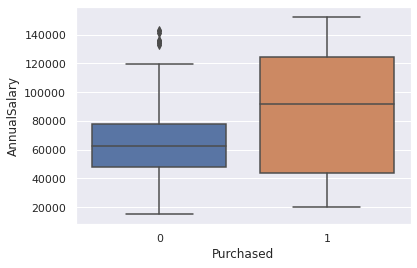

In [ ]:
sns.boxplot(x='Purchased',y='AnnualSalary',data=compra)

## Preparação dos Dados

In [ ]:
# Mudando o Genero para dados categóricos
compra['Gender'] = compra['Gender'].map({'Male':0,'Female':1})

In [ ]:
# Verificando dados nulos
compra.isna().sum()

Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [ ]:
compra.head()

,Gender,Age,AnnualSalary,Purchased
0,0,35,20000,0
1,0,40,43500,0
2,0,49,74000,0
3,0,40,107500,1
4,0,25,79000,0


## Modelagem

In [ ]:
# Importando os comando do sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
x = compra.drop('Purchased',axis=1)
y = compra.Purchased

x_std = StandardScaler().fit_transform(x)

In [ ]:
metricas = ['accuracy','precision','recall']
naive = GaussianNB()
cross_n = cross_validate(naive,x_std,y,cv=10,scoring=metricas)
for met in cross_n:
  if met == 'fit_time' or met == 'score_time':
    pass
  else:
    print(met)
    print(cross_n[met])
    media = np.mean(cross_n[met])
    std = np.std(cross_n[met])
    print('media',media)
    print('desvio',std)
    

    print('-*-'*10)

test_accuracy
[0.91 0.84 0.9  0.85 0.92 0.9  0.82 0.9  0.84 0.89]
media 0.877
desvio 0.0337786915081091
-*--*--*--*--*--*--*--*--*--*-
test_precision
[0.91891892 0.78571429 0.89473684 0.82051282 0.94444444 0.91666667
 0.775      0.875      0.90322581 0.85714286]
media 0.869136264195687
desvio 0.055307854396657
-*--*--*--*--*--*--*--*--*--*-
test_recall
[0.85       0.825      0.85       0.8        0.85       0.825
 0.775      0.875      0.68292683 0.87804878]
media 0.8210975609756097
desvio 0.055087810493441566
-*--*--*--*--*--*--*--*--*--*-


In [ ]:
lg = LogisticRegression()
cross_lg = cross_validate(lg,x_std,y,cv=10,scoring=metricas)
for met in cross_lg:
  if met == 'fit_time' or met == 'score_time':
    pass
  else:
    print(met)
    print(cross_lg[met])
    media = np.mean(cross_lg[met])
    std = np.std(cross_lg[met])
    print('media',media)
    print('desvio',std)
    

    print('-*-'*10)

test_accuracy
[0.84 0.8  0.87 0.77 0.88 0.9  0.83 0.84 0.79 0.8 ]
media 0.8320000000000001
desvio 0.04019950248448355
-*--*--*--*--*--*--*--*--*--*-
test_precision
[0.9        0.73809524 0.88571429 0.72972973 0.88888889 0.91666667
 0.79487179 0.85294118 0.8125     0.83870968]
media 0.8358117457856545
desvio 0.06268041105683535
-*--*--*--*--*--*--*--*--*--*-
test_recall
[0.675      0.775      0.775      0.675      0.8        0.825
 0.775      0.725      0.63414634 0.63414634]
media 0.7293292682926829
desvio 0.06666809499263092
-*--*--*--*--*--*--*--*--*--*-


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
cross_knn = cross_validate(knn,x_std,y,cv=10,scoring=metricas)
for met in cross_knn:
  if met == 'fit_time' or met == 'score_time':
    pass
  else:
    print(met)
    print(cross_knn[met])
    media = np.mean(cross_knn[met])
    std = np.std(cross_knn[met])
    print('media',media)
    print('desvio',std)
    print('-*-'*10)

test_accuracy
[0.92 0.87 0.91 0.88 0.94 0.92 0.9  0.9  0.9  0.91]
media 0.905
desvio 0.019104973174542794
-*--*--*--*--*--*--*--*--*--*-
test_precision
[0.88095238 0.81395349 0.87804878 0.85       0.9047619  0.88095238
 0.85714286 0.84090909 0.8974359  0.88095238]
media 0.8685109161966791
desvio 0.02629903073844438
-*--*--*--*--*--*--*--*--*--*-
test_recall
[0.925      0.875      0.9        0.85       0.95       0.925
 0.9        0.925      0.85365854 0.90243902]
media 0.900609756097561
desvio 0.031064066131787957
-*--*--*--*--*--*--*--*--*--*-


In [ ]:
tree = DecisionTreeClassifier()
cross_tree = cross_validate(tree,x_std,y,cv=10,scoring=metricas)
for met in cross_lg:
  if met == 'fit_time' or met == 'score_time':
    pass
  else:
    print(met)
    print(cross_tree[met])
    media = np.mean(cross_tree[met])
    std = np.std(cross_tree[met])
    print('media',media)
    print('desvio',std)
    print('-*-'*10)

test_accuracy
[0.9  0.88 0.89 0.83 0.93 0.89 0.81 0.91 0.85 0.9 ]
media 0.8789999999999999
desvio 0.03562302626111376
-*--*--*--*--*--*--*--*--*--*-
test_precision
[0.85714286 0.81818182 0.85365854 0.7804878  0.90243902 0.87179487
 0.75609756 0.87804878 0.88235294 0.87804878]
media 0.8478252976100897
desvio 0.0453036099057339
-*--*--*--*--*--*--*--*--*--*-
test_recall
[0.9        0.9        0.875      0.8        0.925      0.85
 0.775      0.9        0.73170732 0.87804878]
media 0.8534756097560976
desvio 0.06044343991626687
-*--*--*--*--*--*--*--*--*--*-


In [ ]:
rf = RandomForestClassifier(criterion='entropy')
cross_rf = cross_validate(rf,x_std,y,cv=5,scoring=metricas)
for met in cross_rf:
  if met == 'fit_time' or met == 'score_time':
    pass
  else:
    print(met)
    print(cross_rf[met])
    media = np.mean(cross_rf[met])
    std = np.std(cross_rf[met])
    print('media',media)
    print('desvio',std)

    

    print('-*-'*10)

test_accuracy
[0.875 0.89  0.92  0.885 0.9  ]
media 0.8940000000000001
desvio 0.015297058540778367
-*--*--*--*--*--*--*--*--*--*-
test_precision
[0.82352941 0.8372093  0.9        0.85365854 0.8961039 ]
media 0.8621002293559098
desvio 0.030890679377760744
-*--*--*--*--*--*--*--*--*--*-
test_recall
[0.875      0.9        0.9        0.86419753 0.85185185]
media 0.8782098765432098
desvio 0.019240652613699658
-*--*--*--*--*--*--*--*--*--*-


In [ ]:
svm = SVC()
cross_svm = cross_validate(svm,x_std,y,cv=10,scoring=metricas)
for met in cross_svm:
  if met == 'fit_time' or met == 'score_time':
    pass
  else:
    print(met)
    print(cross_svm[met])
    media = np.mean(cross_svm[met])
    std = np.std(cross_svm[met])
    print('media',media)
    print('desvio',std)


    print('-*-'*10)

test_accuracy
[0.92 0.86 0.9  0.87 0.91 0.92 0.89 0.91 0.9  0.93]
media 0.901
desvio 0.02118962010041711
-*--*--*--*--*--*--*--*--*--*-
test_precision
[0.86363636 0.7826087  0.875      0.81395349 0.87804878 0.9
 0.85365854 0.86046512 0.8974359  0.86956522]
media 0.8594372095840074
desvio 0.03435677487889755
-*--*--*--*--*--*--*--*--*--*-
test_recall
[0.95       0.9        0.875      0.875      0.9        0.9
 0.875      0.925      0.85365854 0.97560976]
media 0.9029268292682928
desvio 0.03574731200088362
-*--*--*--*--*--*--*--*--*--*-


In [ ]:
grad = GradientBoostingClassifier()
cross_grad = cross_validate(grad,x_std,y,cv=10,scoring=metricas)
for met in cross_grad:
  if met == 'fit_time' or met == 'score_time':
    pass
  else:
    print(met)
    print(cross_grad[met])
    media = np.mean(cross_grad[met])
    std = np.std(cross_grad[met])
    print('media',media)
    print('desvio',std)

test_accuracy
[0.9  0.86 0.92 0.88 0.94 0.93 0.87 0.91 0.87 0.93]
media 0.901
desvio 0.027730849247724104
test_precision
[0.85714286 0.825      0.9        0.81818182 0.94736842 0.90243902
 0.84615385 0.87804878 0.88888889 0.88636364]
media 0.8749587272661727
desvio 0.03718290446838415
test_recall
[0.9        0.825      0.9        0.9        0.9        0.925
 0.825      0.9        0.7804878  0.95121951]
media 0.8806707317073172
desvio 0.05004537649480561


## Avaliação

In [ ]:
aval = {'Modelo':['Naive Bayes','Regressão Logistica','KNN','Árvore de Decisão','Random Forest',
                  'SVM','Gradiente Boosting'],
        'Acuracia':[0.877,0.8320000000000001,0.905,0.8789999999999999,0.8940000000000001,0.901,0.901],
        'Precisão':[0.869136264195687,0.8358117457856545,0.8685109161966791,0.8478252976100897,
                    0.8621002293559098,0.8594372095840074,0.8749587272661727],
        'Recall':[0.8210975609756097,0.7293292682926829,0.900609756097561,0.8534756097560976,
                  0.8782098765432098,0.9029268292682928,0.8806707317073172]}
aval = pd.DataFrame(aval) 
aval                                                       

,Modelo,Acuracia,Precisão,Recall
0,Naive Bayes,0.877,0.869136,0.821098
1,Regressão Logistica,0.832,0.835812,0.729329
2,KNN,0.905,0.868511,0.900610
3,Árvore de Decisão,0.879,0.847825,0.853476
4,Random Forest,0.894,0.862100,0.878210
5,SVM,0.901,0.859437,0.902927
6,Gradiente Boosting,0.901,0.874959,0.880671


Temos o então que o que saiu melhor nesse caso, claro, considerando as casas decimais foi o KNN, então vai ser aplicado uma otimização de parametros aplicando otimização bayesiana.


In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 3.6 MB/s 


In [ ]:
from skopt import BayesSearchCV
parametros = {'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],
              'p':[1,2],'n_neighbors':np.arange(1,21,1)}
bayes = BayesSearchCV(KNeighborsClassifier(n_neighbors=7),search_spaces=parametros,cv=10).fit(x_std,y)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

In [ ]:
bayes.best_params_

OrderedDict([('algorithm', 'kd_tree'),
             ('n_neighbors', 9),
             ('p', 1),
             ('weights', 'uniform')])

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=9,algorithm='kd_tree',p=1,
                            weights='uniform')
cross_knn2 = cross_validate(knn2,x_std,y,cv=10,scoring=metricas)
for met in cross_knn2:
  if met == 'fit_time' or met == 'score_time':
    pass
  else:
    print(met)
    print(cross_knn2[met])
    media = np.mean(cross_knn2[met])
    std = np.std(cross_knn2[met])
    print('media',media)
    print('desvio',std)
    print('-*-'*10)

test_accuracy
[0.95 0.86 0.91 0.88 0.92 0.92 0.9  0.91 0.92 0.93]
media 0.9099999999999999
desvio 0.024083189157584593
-*--*--*--*--*--*--*--*--*--*-
test_precision
[0.92682927 0.79545455 0.87804878 0.83333333 0.88095238 0.88095238
 0.85714286 0.86046512 0.92307692 0.9047619 ]
media 0.8741017490733883
desvio 0.03814348384495996
-*--*--*--*--*--*--*--*--*--*-
test_recall
[0.95       0.875      0.9        0.875      0.925      0.925
 0.9        0.925      0.87804878 0.92682927]
media 0.907987804878049
desvio 0.024876927880056934
-*--*--*--*--*--*--*--*--*--*-


## Conclusão

Temos que o modelo acima pode ser um bom recurso para auxiliar os vendedores e gestores em suas decisões, mas poderia ser melhorado se coletassem outras variaveis como preço do carro, ano do carro, etc que trazendo mais informações poderia melhorar o desempenho do modelo.